Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **44 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [15]:
NAME = "Chretien Li"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Randomized quicksort

## Part A. Median-of-3 partitioning quicksort 

## Question 1 [time estimate: 10 minutes]

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [16]:
import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]

#This function calculates the middle value of 3 values
def median(x1, x2, x3):
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1

#a quicksort that uses the medians from median() as pivots
def qsort(lst):
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst


#randomize a list first, then quicksort it
def randomized_quicksort():
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort(lst)

#function that tests if our quicksort actually works
def test_quicksort():
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.0629267999993317


## Question 2 [time estimate: 3 minutes]

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

The code given by Cormen et. al. randomizes the medians used as pivots. Meanwhile, here, we just randomized the entire list

## Question 3 [time estimate: 10 minutes]

What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

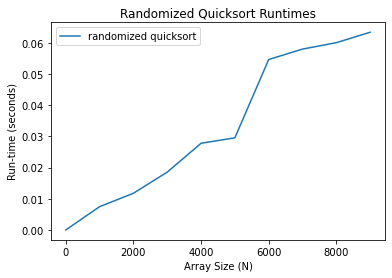

In [17]:
import matplotlib
import matplotlib.pyplot as plt

runs = []
tracker = []

for r in range(10):
    #create samples of size 1000, 2000, 3000...
    N = 1000*r
    tracker.append(N)
    run = 0
    for i in range(10):
    
        # Time run time of randomized quicksort
        run += timeit.timeit(randomized_quicksort,
                            number=1)
    # append to list
    runs.append(run/10)
    
plt.figure()
#matplotlib.rcParams['font.sans-serif'] = "Futura"
plt.title("Randomized Quicksort Runtimes")
plt.plot(tracker, runs, label="randomized quicksort")
plt.xlabel("Array Size (N)")
plt.ylabel("Run-time (seconds)")
plt.legend()

## Question 4.

### Question 4a [time estimate: 7 minutes]

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. In other word, you may want to put the partition in either ```lower``` or ```upper``` list instead of using ``counts`` and ```lst[ind1:ind2] = [partition] * counts``` as we did in question 1.

In [35]:
def qsort(lst):
    indices = [(0, len(lst))]
    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into different arrays
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])
        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back to right positions:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper
        
        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

In [36]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([4,4,2,2,1,1])==[1,1,2,2,4,4])
assert(qsort([0])==[0])

### Question 4b [time estimate: 3 minutes]

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

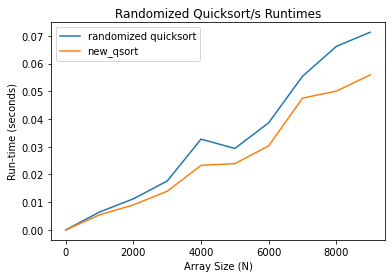

In [38]:
import matplotlib
import matplotlib.pyplot as plt

#do the exact same thing for randomized quicksort, but now also separate variables for our new quicksort
runs = []
runs2 = []
tracker = []
tracker2=[]

for r in range(10):
    #create samples of size 1000, 2000, 3000...
    N = 1000*r
    tracker.append(N)
    tracker2.append(N)
    #create list
    list_n = [i for i in range(N)]

    run = 0
    run2 = 0
    for i in range(10):
        # Time run time of randomized quicksort
        run += timeit.timeit(randomized_quicksort,number=1)
        run2 += timeit.timeit('qsort(list_n)','from __main__ import qsort, list_n',number=1)
    # append to list
    runs.append(run/10)
    runs2.append(run2/10)
    
plt.figure()
plt.title("Randomized Quicksort/s Runtimes")
plt.plot(tracker, runs, label="randomized quicksort")
plt.plot(tracker2, runs2, label="new_qsort")

plt.xlabel("Array Size (N)")
plt.ylabel("Run-time (seconds)")
plt.legend()

## Question 5.

### Question 5a [time estimate: 3 minutes]

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [32]:
def qsort(lst):
    indices = [(0, len(lst))]
    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue
        # Get partition
        partition = lst[0]
        # Split to different arrays:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])
        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

In [33]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b [time estimate: 3 minutes]

Does this change the running time of your algorithm? Justify your response with a graph. 



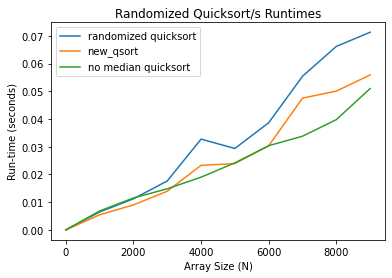

In [39]:
import matplotlib
import matplotlib.pyplot as plt

#now do all three
runs3 = []
tracker3 = []


for r in range(10):
    #create samples of size 1000, 2000, 3000...
    N = 1000*r
    tracker3.append(N)
    #create list
    list_n = [i for i in range(N)]

    run3 = 0
    for i in range(10):
        #latest time for latest quicksort
        run3 += timeit.timeit('qsort(list_n)','from __main__ import qsort, list_n',number=1)
    # append to list
    runs3.append(run3/10)
    
plt.figure()
plt.title("Randomized Quicksort/s Runtimes")
plt.plot(tracker, runs, label="randomized quicksort")
plt.plot(tracker2, runs2, label="new_qsort")
plt.plot(tracker3, runs3, label="no median quicksort")

plt.xlabel("Array Size (N)")
plt.ylabel("Run-time (seconds)")
plt.legend()

## Part B. Recursive quicksort [time estimate: 5 minutes]

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


Assuming only 2-way partitions, our "tree" grows at a rate of 2^N. 2^8 is 256 and 2^9 is 512. This already exceeds 500 recursive calls, so whatever size list that gives us 256 calls